In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray
%matplotlib inline

from typing import Callable, Dict, List


An activation functions add non-linearity to a neural network, which allows the neural network to learn complex tasks. Otherwise with a linear activation function the network will only perform a linear regression.

In [2]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    sigmoid = 1/(1+np.exp(-x))
    derivate_s = sigmoid*(1-sigmoid)  
    return sigmoid, derivate_s


def square(x: np.ndarray) -> np.ndarray:
    return np.power(x,2)

def leaky_relu(x: ndarray) -> ndarray:
    return np.maximum(0.2 * x, x)

def relu(x: ndarray) -> ndarray:
    return np.maximum(0, x)

def tanh(x):
    tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    derivate_t = 1-tanh**2
    return tanh, derivate_t

**sigmoid activation function**:
maps input values between 0 and 1

- nonlinear and monotonic function
- regularization effect, forcing the intermediates to a range between 0 and 1

- produces flat gradients in the backward pass
- outputs are not zero-centered

**tanh activation function**
maps input values between -1 and 1
- nonlinear and monotonic function
- steeper gradient than sigmoid
- outputs are zero-centered

**Relu activation function**
maps input values between 0 and x

- nonlinear and monotonic function
- easy to compute
- avoids vanishing gradient problem
- greatly accelerates the convergence of stochastic gradient descent

- quite fragile during training, neurons can "die"

**Leaky Relu activation function**
maps input values between 0.2*x and x

- tries to fix the dying neuron problem from the ReLU activation

Try to use ReLU, but be careful with the learning rate to avoid the dying neuron problem. In doubt, leaky ReLU can be used. Never use sigmoid. Try tanh, but the convergence is much slower.

(-2.0, 2.0)

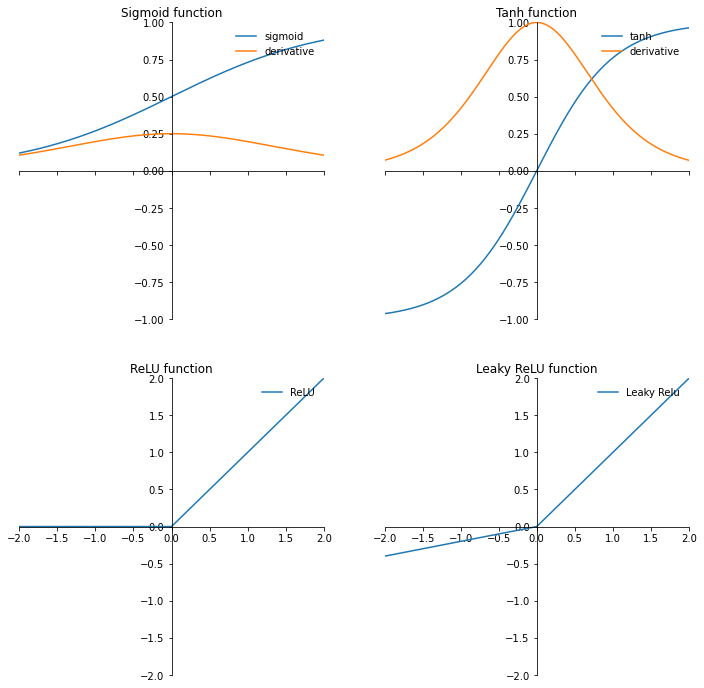

In [3]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(12, 12))  


input_range = np.arange(-6, 6, 0.01)

ax[0,0].plot(input_range, sigmoid(input_range)[0], label="sigmoid")
ax[0,0].plot(input_range, sigmoid(input_range)[1], label="derivative")
ax[0,0].set_title('Sigmoid function')
ax[0,0].spines['left'].set_position('center')
ax[0,0].spines['bottom'].set_position('center')
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].legend(loc="upper right", frameon=False)
ax[0,0].set_ylim(-1,1)

ax[0,1].plot(input_range, tanh(input_range)[0], label="tanh")
ax[0,1].plot(input_range, tanh(input_range)[1], label="derivative")
ax[0,1].set_title('Tanh function')
ax[0,1].spines['left'].set_position('center')
ax[0,1].spines['bottom'].set_position('center')
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].legend(loc="upper right", frameon=False)
ax[0,1].set_ylim(-1,1)

ax[1,0].plot(input_range, relu(input_range), label="ReLU")
ax[1,0].set_title("ReLU function")
ax[1,0].spines['left'].set_position('center')
ax[1,0].spines['bottom'].set_position('center')
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].legend(loc="upper right", frameon=False)
ax[1,0].set_xlim(-2,2)
ax[1,0].set_ylim(-2,2)

ax[1,1].plot(input_range, leaky_relu(input_range), label="Leaky Relu")
ax[1,1].set_title("Leaky ReLU function")
ax[1,1].spines['bottom'].set_position('center')
ax[1,1].spines['left'].set_position('center')
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].legend(loc="upper right", frameon=False)
ax[1,1].set_xlim(-2,2)
ax[1,1].set_ylim(-2,2)


## Batch normalization

One problem of deep learning is the vanishing or exploding gradient problem, which may emerge with gradient-based learning and backpropagation. The problem is, that the gradient to update weights can get very small, so the weights stop changing their values. Having the chain rule in mind, the vanishing gradient depends on the activation function and it's derivate and the number of layers.

More generally, the problem is, that the distribution of each layer's input changes during training, as the parameters of the previous layers change (internal covariance shift)

Batch normalization is an operation before the activation function in each layer. It zero-centers and normalize the inputs and then scales and shifts the results. For each mini-batch, the mean and standard deviation is calculated:

$$ \mu_B = \frac{1}{m_B}\sum_{i=1}^{m_B} x^{(i)}$$

$$ \sigma_B^2 = \frac{1}{m_B}\sum_{i=1}^{m_B} (x^{(i)} - \mu_B)^2$$

the zero-centered and normalized input is:

$$ \hat{x}^{(i)} = \frac{x^{(i)} - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}$$

with the output of the batch normalization:

$$ z^{(i)} = \gamma \hat{x}^{(i)} + \beta $$

with: <br>
   
>    $\gamma$ ... as the scaling parameter of the layer<br>
>    $\beta$ ... shifting parameter<br>
>    $\epsilon$ ... smoothing parameter to avoud division by zero<br>


The advantage of this method is, that:
- vanishing gradient problem was reduced (allowing the use of saturating activation functions like tanh)
- nn were less sensitive to weight initialization
- it is possible to use larger learning rates, which speeds up the training process
- acts as regularizer, which reduces the needs of other regularization techniques like dropout

The disadvantage is:
- adds complexity to the model
- runtime slows down, so slower predictions due to extra computations

## Gradient clipping

To tackle the exploding gradient problem, we can simply clip the gradients to some threshold during backpropagation. 

In [1]:
#todo:
# dropout
# implementation of batch normalization